# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [3]:
# Convert Data_Values to degrees C
df['Data_Value'] *= 0.1

In [4]:
# Convert the Date column into Datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [6]:
# set the new index
df = df.set_index(['Month', 'Day']).sort_index()

In [7]:
# remove leap days 2-29, only 365 days of the year are considered
df = df.drop(df.loc[2, 29].index)

In [8]:
# Splitting dataframes into two - one for 2005-2014 and another for 2015
df_2015 = df[df['Year'] == 2015]
df = df[df['Year'] != 2015]

In [9]:
# Creating two dataframes for 2005-2014 - one each for max and min
high_temp_df = df[df['Element'] == 'TMAX']
low_temp_df = df[df['Element'] == 'TMIN']

In [10]:
# Creating a Sieres with max/min temperatures over the decade 2005-2014 for each day of the year
high_temp = df.groupby(level=['Month', 'Day'])['Data_Value'].max()
low_temp = df.groupby(level=['Month', 'Day'])['Data_Value'].min()

In [11]:
# Creating two dataframes for 2015 - one each for max and min
high_temp_df2015 = df_2015[df_2015['Element'] == 'TMAX']
low_temp_df2015 = df_2015[df_2015['Element'] == 'TMIN']

In [12]:
# Creating a dataframes with 365 rows corresponding to the max/min temperatures for each day of the year 2015
high_temp_2015 = high_temp_df2015.groupby(level=['Month', 'Day']).max()[['Data_Value', 'Date']]
low_temp_2015 = low_temp_df2015.groupby(level=['Month', 'Day']).min()[['Data_Value', 'Date']]

In [13]:
# Need 365 days array for plotting in pandas datetime format; year does not matter so taken 2015 for convenience
date_range = df_2015['Date'].unique()

<IPython.core.display.Javascript object>


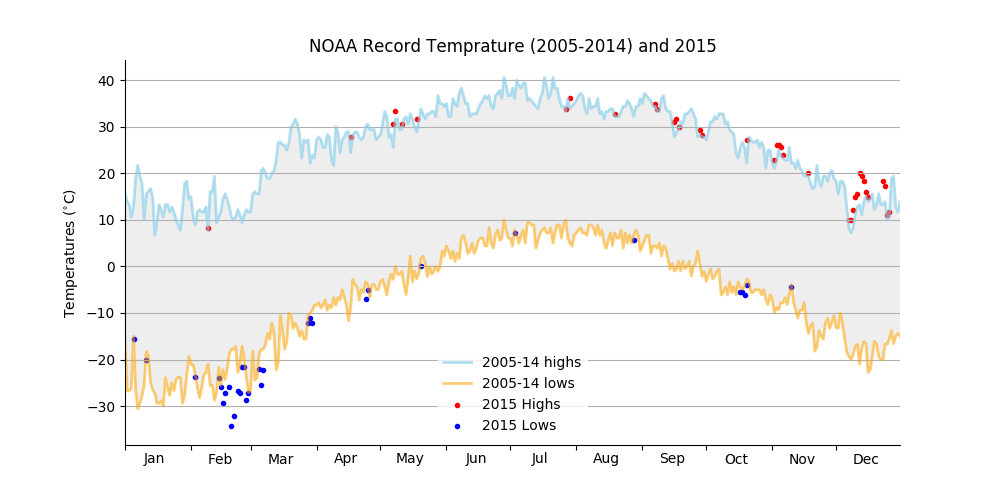

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib notebook

# figure size
plt.figure(figsize=(10,5))
# high temprature line
plt.plot(date_range, high_temp.values, 'skyblue', linewidth=2, alpha=0.65, label='2005-14 highs')
# low temprature line
plt.plot(date_range, low_temp.values, 'orange', linewidth=2, alpha=0.55, label='2005-14 lows')
# fill space in between the high and low temprature
plt.fill_between(date_range, high_temp.values, low_temp.values, facecolor='#EEEEEE')
# add grid on the y axis (vertically)
plt.gca().yaxis.grid()
# add title
plt.title('NOAA Record Temprature (2005-2014) and 2015')
# add label on the Y axis
plt.ylabel('Temperatures $(^{\circ}$C)')

In [15]:
# Labels for the legends of the scatter plots below
my_label_max = "2015 Highs"
my_label_min = "2015 Lows"

# Iterate over the high_temp_df2015 index ['Month', 'Day']
# High 2015 scatter
for idx, rows in high_temp_2015.iterrows():
    if rows['Data_Value'] > high_temp.loc[idx]:
        plt.scatter(rows['Date'], rows['Data_Value'], c = 'red', marker = '.', label = my_label_max)
        my_label_max = "_nolegend_" # To avoid duplicate labels in the legend
# Low 2015 scatter
for idx, rows in low_temp_2015.iterrows():
    if rows['Data_Value'] < low_temp.loc[idx]:
        plt.scatter(rows['Date'], rows['Data_Value'], c = 'blue', marker = '.', label = my_label_min)
        my_label_min = "_nolegend_" # To avoid duplicate labels in the legend

In [16]:
# add legend
plt.legend(loc=0).get_frame().set_edgecolor('white')

In [17]:
# Setting the limits for x-axis to fit the dates perfectly
xmin, xmax = date_range[0], date_range[-1]
plt.xlim(xmin, xmax)

(735599.0, 735963.0)

In [18]:
# Locating 12 positions for the 15th of each month on x-axis 
plt.gca().xaxis.set_major_locator(dates.MonthLocator())
plt.gca().xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))

In [19]:
# Labeling the 12 months on x-axis at the positions located above
plt.gca().xaxis.set_major_formatter(ticker.NullFormatter())
plt.gca().xaxis.set_minor_formatter(dates.DateFormatter('%b'))

In [20]:
# Centering month labels in between the ticks and removing undesirable ticks
ax = plt.gca()
xticks = ax.xaxis.get_minor_ticks()
for xtick in xticks:
    xtick.tick1line.set_markersize(0)
    xtick.tick2line.set_markersize(0)
    xtick.label1.set_horizontalalignment('center')

In [21]:
# Remove the top & right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)